In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("X_train_6GWGSxz.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'X_train_6GWGSxz.csv'

In [ ]:
Y = data.loc[:,"consumption"]

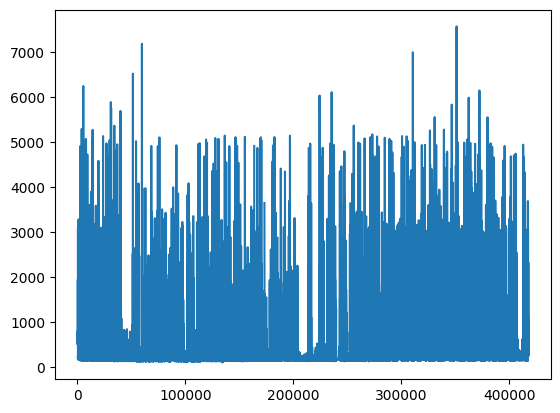

In [ ]:
plt.plot(Y)

In [ ]:
def extract_timeofday(date):
    l = date.split("T")
    return l[1]
def extract_day(date):
    l = date.split("T")
    return l[0]

def extract_months(day):
    l = day.split("-")

    return l[1]
def extract_days(day):
    l = day.split("-")

    return l[1]+":"+l[2]

def extract_days_num(day):
    l = day.split("-")

    return (int(l[1])-1)*30+int(l[2])

def extract_weeks(day):
    day_num = extract_days_num(day)
    return day_num//7

def extract_hour(timeofday):
    l = timeofday.split(":")
    return l[0]
def extract_minute(timeofday):
    l = timeofday.split(":")
    return l[0] + ":" + l[1]


def moyenne(l):
    S = 0
    for k in l:
        S+=k
    return S/len(l)

In [ ]:
def afficher(consumptions, times):
    nb_times = 0
    dic = {}
    temps = []
    N = len(consumptions)
    L = []
    TAILLES= []
    if N==len(times):
        for i in range(N):
            if not pd.isnull(consumptions[i]):
                if(times[i] in dic):
                    L[dic[times[i]]]+=float(consumptions[i])
                    TAILLES[dic[times[i]]]+=1
                else:
                    dic[times[i]]=nb_times
                    L.append(float(consumptions[i]))
                    TAILLES.append(1)
                    nb_times+=1
    for i in range(len(L)):
        L[i]/=TAILLES[i]
    
    plt.plot(L)



In [ ]:
consumptions = [data["consumption"][i] for i in data.index]
times = [extract_timeofday(data["time_step"][i]) for i in data.index]
date = [extract_day(data["time_step"][i]) for i in data.index]
hours = [extract_hour(k) for k in times]
minutes = [extract_minute(k) for k in times]
months = [extract_months(k) for k in date]
days = [extract_days(k) for k in date]
weeks = [extract_weeks(k) for k in date]

In [ ]:
a = extract_day(data["time_step"][0]) 
print(a,extract_days_num(a))
print(extract_weeks(a))

2013-03-17 77
11


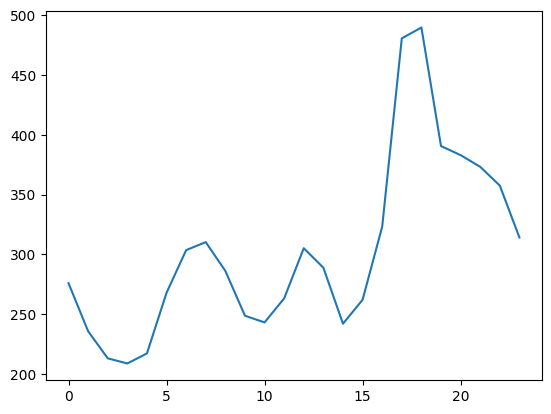

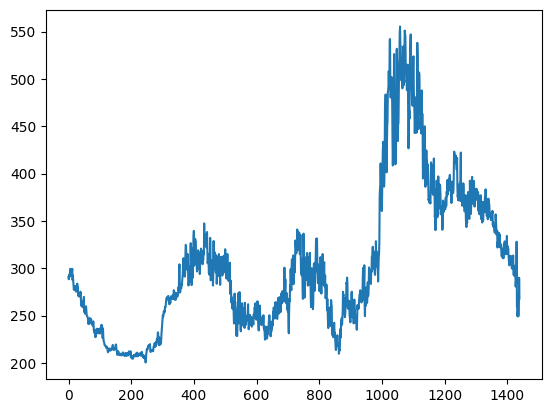

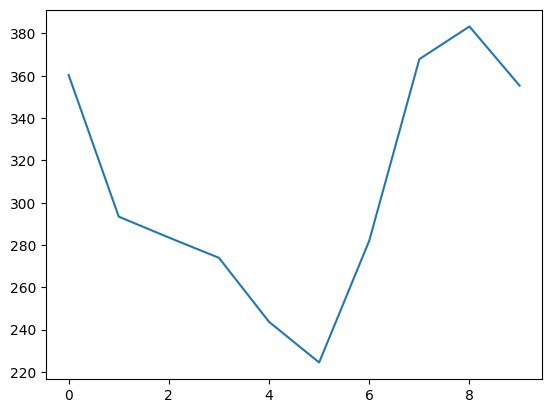

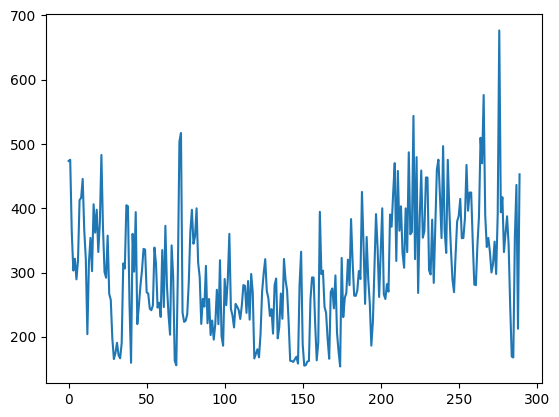

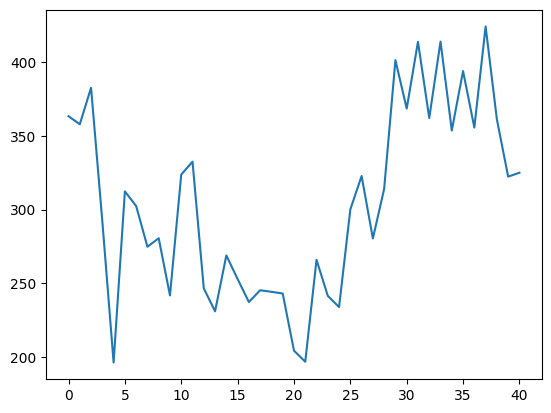

In [ ]:
afficher(consumptions, hours)
plt.figure()
afficher(consumptions, minutes)
plt.figure()
afficher(consumptions, months)
plt.figure()
afficher(consumptions, days)
plt.figure()
afficher(consumptions, weeks)